### <h1 align="center">CPSC 4830</h1>
<h2 align="center">MIDTERM</h2>
<h2 align="center">TIME - 2 HR 30 MIN</h2>
<h2 align="center">START TIME - 3.30 PM, END TIME - 6.00 PM</h2>
<h2 align="center">MAX MARKS - 20</h2>

<h2 align="center">All work must be completed in this file and Submit the resulting .ipynb in D2L</h2>

<h2 align="center"> Absolutely No Collaboration. Solutions with 90% and above similarity would be investigated further for possible plagiarism and cheating. If found guilty, then collobarators would be assigned a grade of 0 without any grades even for non cheated part.</h2>


### Q1. The SMS Spam Collection is a set of SMS tagged messages that have been collected from SMS Spam research database. It contains one set of SMS messages in English of 5,572 messages, tagged acording being ham (legitimate) or spam.

### Out of the 5572 sets of sms messages, approximately 20% of the messages have been trimmed and kept aside for Evaluating your model by the Instructor. You only have 4458 rows to build your model. Rest will be used by the instructor as a blind evaluation of your model. This data is not provided to you.

### Use this dataset to build a prediction model as follows that will accurately classify which texts are spam? 

### Use Logistic Regression with L2 Regularisation and CV (K=3) (using your intelligent choice of Hyperparameters), find the accuracy of SPAM/HAM detection. [10 Marks]

In [32]:
# Start Here for Q1
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import string

import os
import math
import re
import nltk

import warnings
warnings.filterwarnings('ignore')

sms = pd.read_csv('spamhamtrain.csv')
sms

,Category,Message
0,ham,"K I'm leaving soon, be there a little after 9"
1,ham,No. Yes please. Been swimming?
2,ham,It took Mr owl 3 licks
3,ham,Its going good...no problem..but still need li...
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...
...,...,...
4452,ham,K:)k:)good:)study well.
4453,ham,"Chinatown got porridge, claypot rice, yam cake..."
4454,ham,"Hmm... Dunno leh, mayb a bag 4 goigng out dat ..."
4455,ham,Tell me whos this pls:-)


In [33]:
sms.head(5)

,Category,Message
0,ham,"K I'm leaving soon, be there a little after 9"
1,ham,No. Yes please. Been swimming?
2,ham,It took Mr owl 3 licks
3,ham,Its going good...no problem..but still need li...
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...


In [34]:
#checking the no. of ham and spam
sms['Category'].value_counts()

ham     3863
spam     594
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

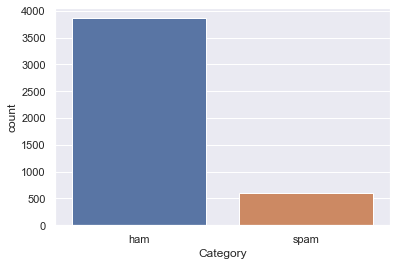

In [35]:
sns.countplot(x='Category', data=sms)

In [36]:
#checking the average length of the message for any dissimilarity
#creating a new text_len column (length of text, both ham and spam)
sms['text_len'] = sms['Message'].apply(len)
sms
print("Average text length : ", round(sms['text_len'].mean()))

Average text length :  80


In [38]:
sms['Cat_num'] = sms['Category'].map({'ham':0, 'spam':1})
sms.head(5)

,Category,Message,text_len,Cat_num
0,ham,"K I'm leaving soon, be there a little after 9",45,0
1,ham,No. Yes please. Been swimming?,30,0
2,ham,It took Mr owl 3 licks,22,0
3,ham,Its going good...no problem..but still need li...,102,0
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...,155,0


In [48]:
spam_len = sms.loc[sms["Cat_num"] == 1, "text_len"]
ham_len = sms.loc[sms["Cat_num"] == 0, "text_len"]
print('Average length of spam emails :', round(spam_len.mean()))
print('Average length of ham emails :', round(ham_len.mean()))

Average length of spam emails : 138
Average length of ham emails : 72


spam emails are longer as compared to ham 

In [54]:
## data preprocessing
## removing punctuation and lower case conversion
def remove_punctuation(Message):
    nopunct ="".join([i for i in Message if i not in string.punctuation])
    return nopunct

sms['Message'] = sms['Message'].apply(lambda x: remove_punctuation(x))

sms['Message'] = sms['Message'].apply(lambda x: x.lower())

sms.head(5)

,Category,Message,text_len,Cat_num
0,ham,k im leaving soon be there a little after 9,45,0
1,ham,no yes please been swimming,30,0
2,ham,it took mr owl 3 licks,22,0
3,ham,its going goodno problembut still need little ...,102,0
4,ham,k i yan jiu liao sat we can go 4 bugis vill on...,155,0


In [56]:
sms.isnull().sum()

Category    0
Message     0
text_len    0
Cat_num     0
dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

# dataframe to array
x, y = np.asanyarray(sms['Message']), np.asanyarray(sms['Cat_num'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [59]:
len(x_train), len(x_test), len(y_test), len(y_train)

(3565, 892, 892, 3565)

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [74]:
count_vec = CountVectorizer().fit(x_train)
x_train_vec, x_test_vec = count_vec.transform(x_train), count_vec.transform(x_test)

In [98]:
model = LogisticRegression(penalty='l2')
model.fit(x_train_vec, y_train)

LogisticRegression()

In [99]:
y_predict = model.predict(x_test_vec)

In [102]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       773
           1       0.99      0.86      0.92       119

    accuracy                           0.98       892
   macro avg       0.98      0.93      0.95       892
weighted avg       0.98      0.98      0.98       892



with a precison of 98%, the logistic model has an accuracy of 98% 

In [110]:
kf = KFold(n_splits = 3)
result = cross_val_score(model , x_train_vec, y_train, cv = kf,n_jobs=-1)

print('Accuracy =:',result.mean())

Accuracy =: 0.9739109155285214


Validating the model with 3 fold cross validation, the accuracy is 97.3%

### Q2. Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk. 

### The data file credit_card_application.csv contains all the details collected from different customers whose attributes are explained in the table below. 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-cly1{text-align:left;vertical-align:middle}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-cly1">Feature name</th>
    <th class="tg-cly1">Explanation</th>
    <th class="tg-cly1">Remarks</th>
  </tr>
  <tr>
    <td class="tg-cly1">ID</td>
    <td class="tg-cly1">client number</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'CODE_GENDER'</td>
    <td class="tg-cly1">gender</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAGOWNCAR'</td>
    <td class="tg-cly1">Is there a car</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAGOWNREALTY'</td>
    <td class="tg-cly1">Is there a property</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'CNT_CHILDREN'</td>
    <td class="tg-cly1">Number of children</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'AMTINCOMETOTAL'</td>
    <td class="tg-cly1">Annual income</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEINCOMETYPE'</td>
    <td class="tg-cly1">Income category</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEEDUCATIONTYPE'</td>
    <td class="tg-cly1">education level</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEFAMILYSTATUS'</td>
    <td class="tg-cly1">Marital status</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEHOUSINGTYPE'</td>
    <td class="tg-cly1">Way of living</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'DAYS_BIRTH'</td>
    <td class="tg-cly1">birthday</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'DAYS_EMPLOYED'</td>
    <td class="tg-cly1">Start date</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAG_MOBIL'</td>
    <td class="tg-cly1">Is there a mobile phone</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAGWORKPHONE'</td>
    <td class="tg-0lax">Is there a work phone</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAG_PHONE'</td>
    <td class="tg-0lax">Is there a phone</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAG_EMAIL'</td>
    <td class="tg-0lax">Is there an email</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'OCCUPATION_TYPE'</td>
    <td class="tg-0lax">Occupation</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'CNTFAMMEMBERS'</td>
    <td class="tg-0lax">Family size</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">begin_month</td>
    <td class="tg-0lax">record month</td>
    <td class="tg-0lax">The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on</td>
  </tr>
  <tr>
    <td class="tg-0lax">target</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">1 for high risk and 0 for low risk</td>
  </tr>
</table>


### Use PCA to find the principle components of the given data. Find the retained variance of the data and how much is lost due to applying PCA. If required drop the Null values in the column and get rid of unnecessary categorical columns before applying PCA. 
### Explain each step including why some columns are to be dropped before applying PCA. Scaling is necessary and must be applied here.

### [10 Marks]

In [278]:
# Start Here for Q2


credit = pd.read_csv('credit_card_application.csv')
credit.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-15,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-14,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-26,0


In [254]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [279]:
credit.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
begin_month                0
target                     0
dtype: int64

In [280]:
## dropping null (too many null)
credit.dropna(axis=0, inplace=True )

In [281]:
credit.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
begin_month            0
target                 0
dtype: int64

In [282]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 2 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   25134 non-null  int64  
 1   CODE_GENDER          25134 non-null  object 
 2   FLAG_OWN_CAR         25134 non-null  object 
 3   FLAG_OWN_REALTY      25134 non-null  object 
 4   CNT_CHILDREN         25134 non-null  int64  
 5   AMT_INCOME_TOTAL     25134 non-null  float64
 6   NAME_INCOME_TYPE     25134 non-null  object 
 7   NAME_EDUCATION_TYPE  25134 non-null  object 
 8   NAME_FAMILY_STATUS   25134 non-null  object 
 9   NAME_HOUSING_TYPE    25134 non-null  object 
 10  DAYS_BIRTH           25134 non-null  int64  
 11  DAYS_EMPLOYED        25134 non-null  int64  
 12  FLAG_MOBIL           25134 non-null  int64  
 13  FLAG_WORK_PHONE      25134 non-null  int64  
 14  FLAG_PHONE           25134 non-null  int64  
 15  FLAG_EMAIL           25134 non-null 

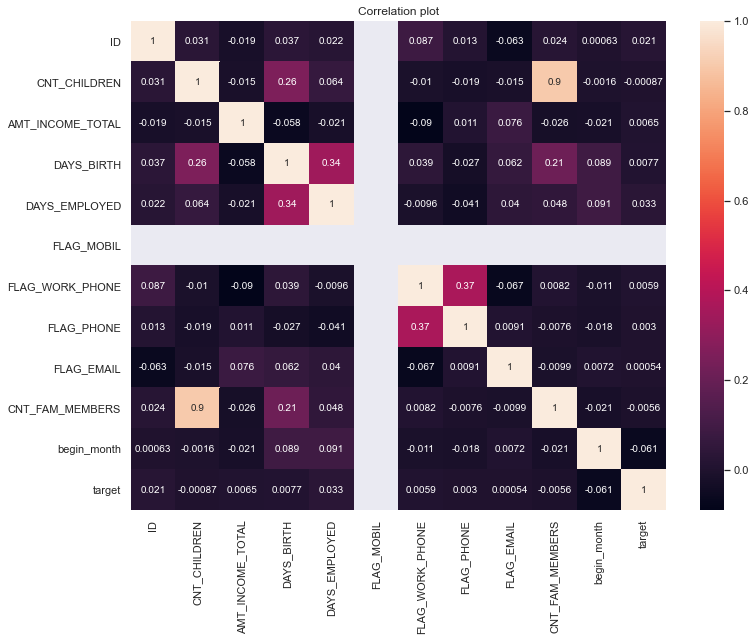

In [283]:
credit_corr = credit.corr()
plt.figure(figsize = (12, 9))
sns.heatmap(credit_corr, annot = True)
plt.title('Correlation plot')
plt.show()

In [284]:
##Dropping unnecessary and highly correlated variables
credit.drop(columns=['FLAG_MOBIL','ID', 'target','CNT_CHILDREN'], inplace=True)
credit.head(5)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month
2,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2,-29
3,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,-4
4,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,-26
5,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,-26
6,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,-38


In [285]:
## Dummies for PCA for categorical var.
##PCA only runs on numerical data
gender = pd.get_dummies(credit['CODE_GENDER'],drop_first=True)
Car= pd.get_dummies(credit['FLAG_OWN_CAR'],drop_first=True)
Realty=pd.get_dummies(credit['FLAG_OWN_REALTY'],drop_first=True)
incometype=pd.get_dummies(credit['NAME_INCOME_TYPE'],drop_first=True)
edutype=pd.get_dummies(credit['NAME_EDUCATION_TYPE'],drop_first=True)
familystatus=pd.get_dummies(credit['NAME_FAMILY_STATUS'],drop_first=True)
housingtype=pd.get_dummies(credit['NAME_HOUSING_TYPE'],drop_first=True)
occupationtype=pd.get_dummies(credit['OCCUPATION_TYPE'],drop_first=True)

In [286]:
## Dropping categorical columns
credit.drop(columns = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'], inplace=True)

In [287]:
credit.head(5)

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,begin_month
2,112500.0,-21474,-1134,0,0,0,2,-29
3,270000.0,-19110,-3051,0,1,1,1,-4
4,270000.0,-19110,-3051,0,1,1,1,-26
5,270000.0,-19110,-3051,0,1,1,1,-26
6,270000.0,-19110,-3051,0,1,1,1,-38


In [288]:
credit = pd.concat([credit,gender,Car,Realty,incometype,edutype,familystatus,housingtype,occupationtype],axis=1)
credit.head(5)

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,begin_month,M,Y,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
2,112500.0,-21474,-1134,0,0,0,2,-29,1,1,...,0,0,0,0,0,0,0,0,1,0
3,270000.0,-19110,-3051,0,1,1,1,-4,0,0,...,0,0,0,0,0,0,1,0,0,0
4,270000.0,-19110,-3051,0,1,1,1,-26,0,0,...,0,0,0,0,0,0,1,0,0,0
5,270000.0,-19110,-3051,0,1,1,1,-26,0,0,...,0,0,0,0,0,0,1,0,0,0
6,270000.0,-19110,-3051,0,1,1,1,-38,0,0,...,0,0,0,0,0,0,1,0,0,0


In [289]:
col = credit

In [291]:
col.head(5)

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,begin_month,M,Y,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
2,112500.0,-21474,-1134,0,0,0,2,-29,1,1,...,0,0,0,0,0,0,0,0,1,0
3,270000.0,-19110,-3051,0,1,1,1,-4,0,0,...,0,0,0,0,0,0,1,0,0,0
4,270000.0,-19110,-3051,0,1,1,1,-26,0,0,...,0,0,0,0,0,0,1,0,0,0
5,270000.0,-19110,-3051,0,1,1,1,-26,0,0,...,0,0,0,0,0,0,1,0,0,0
6,270000.0,-19110,-3051,0,1,1,1,-38,0,0,...,0,0,0,0,0,0,1,0,0,0


In [292]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
col = StandardScaler().fit_transform(col)

In [268]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(col)
principalca = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5'])

In [269]:
principalca.head(5)

,PC1,PC2,PC3,PC4,PC5
0,-1.200521,1.522184,-1.042350,-1.072938,0.373453
1,-1.215260,-2.816145,-0.335301,-1.079364,-0.693402
2,-1.176643,-2.771390,-0.444172,-1.098533,-0.452480
3,-1.176643,-2.771390,-0.444172,-1.098533,-0.452480
4,-1.155579,-2.746978,-0.503556,-1.108989,-0.321068


In [271]:
sum(pca.explained_variance_ratio_)

0.23296882773461705

the first 5 components of the PCA explain only 23% of the information. 

In [293]:
##taking 10 components to check for increased variability
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(col)
principalca = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [294]:
sum(pca.explained_variance_ratio_)

0.3764421572099299

only 37% of the variability is explained by first 10 components. 
we can check for the optimum number of components by plotting a scree plot for having the maximum variability.